## Imports the libraries that we are going to use to preprocess and analyze our data.

In [216]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Load the datasets 

In [217]:
dataset = pd.read_csv('test_data.csv')


In [218]:
dataset2 = pd.read_csv('test_data.csv')


In [219]:
dataset1 = pd.read_csv('train_data.csv')

## Explore our datasets and see if we can find any patterns.

In [220]:
dataset1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [202]:
dataset2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15642544,Henderson,723,France,Male,34,5,0.00,2,0,1,12092.03
1,15779492,Trevisano,796,Spain,Male,56,6,94231.13,1,0,0,121164.60
2,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41
3,15582591,Chiabuotu,615,Spain,Male,59,4,155766.05,1,1,1,110275.17
4,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42



#### number of unique observations per column

In [241]:
dataset1.nunique()

CustomerId         4459
Surname            1893
CreditScore         442
Geography             3
Gender                2
Age                  61
Tenure               11
Balance            4457
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    4459
Exited                2
dtype: int64

#### Total of  13 columns in our dataset. We need to drop columns that have no effect whether a customer exists or not.

## Surname and CustomerId are irrelevant to our dataset. We remove it by using the drop feature.

In [242]:
TestData = dataset2.drop(['Surname', 'CustomerId'], axis=1, inplace = True)

In [243]:
tempdata = dataset2.drop(['Geography', 'Gender'], axis=1)

In [244]:
Geography = pd.get_dummies(dataset2.Geography).iloc[:,1:]

Gender = pd.get_dummies(dataset2.Gender).iloc[:,1:]

In [245]:
TestData = pd.concat([tempdata,Geography,Gender], axis=1)

In [246]:
TestData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,723,34,5,0.00,2,0,1,12092.03,0,0,1
1,796,56,6,94231.13,1,0,0,121164.60,0,1,1
2,755,43,6,165048.50,3,1,0,16929.41,1,0,1
3,615,59,4,155766.05,1,1,1,110275.17,0,1,1
4,430,36,1,138992.48,2,0,0,122373.42,1,0,1


In [247]:
dataset1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1
5,15805429,Murray,699,Germany,Male,59,3,106819.65,1,0,1,163570.25,0
6,15583138,Persse,739,France,Male,42,2,141642.92,2,1,0,172149.76,0
8,15770543,Lowe,679,France,Male,37,7,74260.03,1,1,0,194617.98,0
9,15676513,Burns,601,Germany,Male,35,8,71553.83,1,1,0,177384.45,0


In [248]:
dataset1.drop(['CustomerId', 'Surname'], axis=1, inplace = True)

In [249]:
dataset1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1
5,699,Germany,Male,59,3,106819.65,1,0,1,163570.25,0
6,739,France,Male,42,2,141642.92,2,1,0,172149.76,0
8,679,France,Male,37,7,74260.03,1,1,0,194617.98,0
9,601,Germany,Male,35,8,71553.83,1,1,0,177384.45,0


## To see the statistical details of the numeric columns in our dataset, we use describe

In [250]:
dataset1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000
mean,649.659565,39.155416,5.004485,119863.967479,1.383270,0.705315,0.511325,100553.910130,0.237721
std,97.759865,10.255914,2.904565,29801.684446,0.578513,0.455952,0.499928,57063.763455,0.425735
min,350.000000,19.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,440.200000,0.000000
25%,582.500000,32.000000,2.000000,100250.795000,1.000000,0.000000,0.000000,52312.255000,0.000000
50%,652.000000,38.000000,5.000000,119948.090000,1.000000,1.000000,1.000000,101141.280000,0.000000
75%,716.000000,44.000000,8.000000,139830.245000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,850.000000,79.000000,10.000000,209490.210000,4.000000,1.000000,1.000000,199727.720000,1.000000


# Checking to see if Gender has any effect on whether a customer exists or not.

<AxesSubplot:xlabel='Gender'>

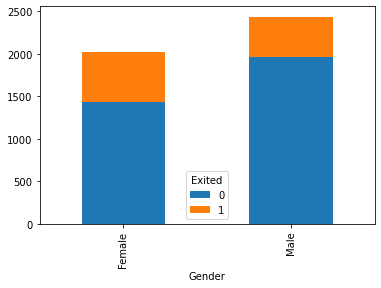

In [251]:
counts = dataset1.groupby(['Gender', 'Exited']).Exited.count().unstack()

counts.plot(kind='bar', stacked=True)

### The ratio of customers leaving among females is higher than the males.

### The relationship between the geography of the customer and the customer churn.

<AxesSubplot:xlabel='Geography'>

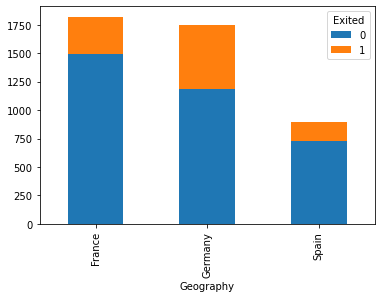

In [252]:
counts = dataset1.groupby(['Geography', 'Exited']).Exited.count().unstack()

counts.plot(kind='bar', stacked=True)

#### the ratio of customer churn is highest among the German customers while lower among the French customers.

## categorical columns are Geography and Gender
### We convert categorical data into numerical data using one-hot encoding scheme. 

In [253]:
tempdata = dataset1.drop(['Geography', 'Gender'], axis=1)

In [254]:
Geography = pd.get_dummies(dataset1.Geography).iloc[:,1:]

Gender = pd.get_dummies(dataset1.Gender).iloc[:,1:]


In [255]:
dataset1 = pd.concat([tempdata,Geography,Gender], axis=1)

In [256]:
dataset1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
4,768,37,9,108308.11,1,1,0,41788.25,1,1,0,1
5,699,59,3,106819.65,1,0,1,163570.25,0,1,0,1
6,739,42,2,141642.92,2,1,0,172149.76,0,0,0,1
8,679,37,7,74260.03,1,1,0,194617.98,0,0,0,1
9,601,35,8,71553.83,1,1,0,177384.45,0,1,0,1


In [257]:
# Find correlations with the target and sort
correlations = dataset1.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 EstimatedSalary    0.017400
NumOfProducts      0.081727
Germany            0.157791
Age                0.311136
Exited             1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.186551
Male             -0.107742
Spain            -0.058298
CreditScore      -0.040369
HasCrCard         0.000423
Name: Exited, dtype: float64


### The strongest positive correlations with the target features are: EstimatedSalary, Balance, Age .
### The strongest negative correlations with the target features are: IsActiveMember, NumOfProducts, Tenure, HasCrCard *, and *CreditScore . 

#### Dividing Data into Training and Test Sets

In [258]:
dataset_features = dataset1.drop(['Exited'], axis=1)

dataset_labels = dataset1['Exited']

In [259]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21)

In [260]:
test_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
2073,696,32,4,84421.62,1,0,1,52314.71,1,0,1
3800,668,38,1,147904.31,1,1,1,69370.05,0,1,1
4920,495,34,9,117160.32,1,1,1,116069.24,1,0,0
4999,470,31,2,101675.22,2,1,0,45033.75,0,1,0
1699,655,32,9,113447.01,1,1,0,82084.30,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4342,782,70,7,97072.42,1,0,1,131177.22,0,0,0
1000,645,55,1,133676.65,1,0,1,17095.49,0,1,0
5704,526,66,7,132044.60,2,1,1,158365.89,0,1,1
6234,566,42,3,108010.78,1,1,1,157486.10,0,0,1


### Training and Evaluation of Machine Learning Models

##### Random Forest Classifier

In [261]:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc_object = rfc(n_estimators=200, random_state=0)

rfc_object.fit(train_features, train_labels)

predicted_labels = rfc_object.predict(TestData)

In [262]:
dic = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels}

In [263]:
Result = pd.DataFrame(dic)
Result.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [264]:
Result.to_csv('final.csv', index=False)

##### Cat Boost Classifier


#### CatBoost is an algorithm for gradient boosting on decision trees. 

In [265]:
from catboost import CatBoostClassifier as bfc

## Tune the Hyperparameters for Better Performance Using GridSearchCV

In [266]:
#import libraries
from sklearn import datasets
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

#Instantiate CatBoostClassifier
cbc = CatBoostClassifier()

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(dataset_features,dataset_labels)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

Learning rate set to 0.146476
0:	learn: 0.6376955	total: 663us	remaining: 65.6ms
1:	learn: 0.5910815	total: 1.39ms	remaining: 68ms
2:	learn: 0.5534920	total: 2.06ms	remaining: 66.5ms
3:	learn: 0.5276869	total: 2.74ms	remaining: 65.8ms
4:	learn: 0.5076747	total: 3.42ms	remaining: 65.1ms
5:	learn: 0.4955193	total: 4.15ms	remaining: 65ms
6:	learn: 0.4796691	total: 4.87ms	remaining: 64.7ms
7:	learn: 0.4683320	total: 5.63ms	remaining: 64.7ms
8:	learn: 0.4571885	total: 6.26ms	remaining: 63.4ms
9:	learn: 0.4502579	total: 7.12ms	remaining: 64.1ms
10:	learn: 0.4415635	total: 7.92ms	remaining: 64.1ms
11:	learn: 0.4339048	total: 8.71ms	remaining: 63.9ms
12:	learn: 0.4277564	total: 9.46ms	remaining: 63.3ms
13:	learn: 0.4235097	total: 10.2ms	remaining: 62.4ms
14:	learn: 0.4193774	total: 11ms	remaining: 62.3ms
15:	learn: 0.4157817	total: 11.8ms	remaining: 61.9ms
16:	learn: 0.4116655	total: 12.5ms	remaining: 61ms
17:	learn: 0.4096062	total: 13.2ms	remaining: 60ms
18:	learn: 0.4076220	total: 13.8ms	re

19:	learn: 0.4002377	total: 15.1ms	remaining: 60.4ms
20:	learn: 0.3986085	total: 15.9ms	remaining: 59.7ms
21:	learn: 0.3968180	total: 16.6ms	remaining: 58.7ms
22:	learn: 0.3950206	total: 17.3ms	remaining: 58ms
23:	learn: 0.3922915	total: 18ms	remaining: 57ms
24:	learn: 0.3907650	total: 18.6ms	remaining: 55.9ms
25:	learn: 0.3896407	total: 19.3ms	remaining: 55ms
26:	learn: 0.3890238	total: 20ms	remaining: 54ms
27:	learn: 0.3878497	total: 20.7ms	remaining: 53.2ms
28:	learn: 0.3870391	total: 21.4ms	remaining: 52.4ms
29:	learn: 0.3861638	total: 22.2ms	remaining: 51.9ms
30:	learn: 0.3859046	total: 22.9ms	remaining: 51.1ms
31:	learn: 0.3846199	total: 23.6ms	remaining: 50.2ms
32:	learn: 0.3838883	total: 24.3ms	remaining: 49.3ms
33:	learn: 0.3831108	total: 25ms	remaining: 48.5ms
34:	learn: 0.3824987	total: 25.7ms	remaining: 47.7ms
35:	learn: 0.3820054	total: 26.3ms	remaining: 46.8ms
36:	learn: 0.3807158	total: 27ms	remaining: 46ms
37:	learn: 0.3799491	total: 27.7ms	remaining: 45.1ms
38:	learn: 

38:	learn: 0.3823434	total: 30.7ms	remaining: 48ms
39:	learn: 0.3814256	total: 31.4ms	remaining: 47.1ms
40:	learn: 0.3807482	total: 32ms	remaining: 46ms
41:	learn: 0.3803055	total: 32.6ms	remaining: 45ms
42:	learn: 0.3792626	total: 33.3ms	remaining: 44.1ms
43:	learn: 0.3786673	total: 34.1ms	remaining: 43.4ms
44:	learn: 0.3771550	total: 35.1ms	remaining: 42.9ms
45:	learn: 0.3763234	total: 35.8ms	remaining: 42ms
46:	learn: 0.3753707	total: 36.6ms	remaining: 41.2ms
47:	learn: 0.3750309	total: 37.2ms	remaining: 40.3ms
48:	learn: 0.3743599	total: 37.9ms	remaining: 39.4ms
49:	learn: 0.3741008	total: 38.8ms	remaining: 38.8ms
50:	learn: 0.3737220	total: 39.6ms	remaining: 38ms
51:	learn: 0.3729627	total: 40.3ms	remaining: 37.2ms
52:	learn: 0.3726996	total: 41ms	remaining: 36.4ms
53:	learn: 0.3724339	total: 41.7ms	remaining: 35.5ms
54:	learn: 0.3720876	total: 42.3ms	remaining: 34.6ms
55:	learn: 0.3715534	total: 42.9ms	remaining: 33.7ms
56:	learn: 0.3711978	total: 43.9ms	remaining: 33.1ms
57:	lea

101:	learn: 0.3639643	total: 124ms	remaining: 119ms
102:	learn: 0.3637041	total: 125ms	remaining: 118ms
103:	learn: 0.3633394	total: 126ms	remaining: 117ms
104:	learn: 0.3631219	total: 128ms	remaining: 115ms
105:	learn: 0.3628598	total: 129ms	remaining: 114ms
106:	learn: 0.3626514	total: 130ms	remaining: 113ms
107:	learn: 0.3625027	total: 131ms	remaining: 112ms
108:	learn: 0.3622661	total: 133ms	remaining: 111ms
109:	learn: 0.3620858	total: 134ms	remaining: 110ms
110:	learn: 0.3617833	total: 135ms	remaining: 108ms
111:	learn: 0.3615717	total: 136ms	remaining: 107ms
112:	learn: 0.3612491	total: 138ms	remaining: 106ms
113:	learn: 0.3608183	total: 139ms	remaining: 105ms
114:	learn: 0.3603234	total: 140ms	remaining: 104ms
115:	learn: 0.3602179	total: 142ms	remaining: 103ms
116:	learn: 0.3598011	total: 143ms	remaining: 102ms
117:	learn: 0.3595013	total: 145ms	remaining: 100ms
118:	learn: 0.3592942	total: 146ms	remaining: 99.3ms
119:	learn: 0.3590791	total: 147ms	remaining: 98ms
120:	learn: 

187:	learn: 0.3343013	total: 249ms	remaining: 15.9ms
188:	learn: 0.3341117	total: 251ms	remaining: 14.6ms
189:	learn: 0.3339571	total: 252ms	remaining: 13.3ms
190:	learn: 0.3337554	total: 253ms	remaining: 11.9ms
191:	learn: 0.3335390	total: 254ms	remaining: 10.6ms
192:	learn: 0.3332283	total: 256ms	remaining: 9.27ms
193:	learn: 0.3329438	total: 257ms	remaining: 7.94ms
194:	learn: 0.3327218	total: 258ms	remaining: 6.62ms
195:	learn: 0.3325036	total: 259ms	remaining: 5.29ms
196:	learn: 0.3322736	total: 260ms	remaining: 3.96ms
197:	learn: 0.3318844	total: 262ms	remaining: 2.64ms
198:	learn: 0.3315353	total: 263ms	remaining: 1.32ms
199:	learn: 0.3313638	total: 264ms	remaining: 0us
Learning rate set to 0.077575
0:	learn: 0.6538963	total: 1.09ms	remaining: 216ms
1:	learn: 0.6134942	total: 2.2ms	remaining: 218ms
2:	learn: 0.5856208	total: 3.22ms	remaining: 212ms
3:	learn: 0.5576839	total: 4.45ms	remaining: 218ms
4:	learn: 0.5379509	total: 5.94ms	remaining: 232ms
5:	learn: 0.5177491	total: 7.3

74:	learn: 0.3735550	total: 91ms	remaining: 152ms
75:	learn: 0.3729875	total: 92.4ms	remaining: 151ms
76:	learn: 0.3727246	total: 93.8ms	remaining: 150ms
77:	learn: 0.3725044	total: 95ms	remaining: 149ms
78:	learn: 0.3718650	total: 96.2ms	remaining: 147ms
79:	learn: 0.3716350	total: 97.6ms	remaining: 146ms
80:	learn: 0.3713646	total: 98.7ms	remaining: 145ms
81:	learn: 0.3712069	total: 99.9ms	remaining: 144ms
82:	learn: 0.3708089	total: 101ms	remaining: 143ms
83:	learn: 0.3704915	total: 103ms	remaining: 142ms
84:	learn: 0.3702038	total: 104ms	remaining: 140ms
85:	learn: 0.3699278	total: 105ms	remaining: 139ms
86:	learn: 0.3697195	total: 106ms	remaining: 138ms
87:	learn: 0.3689479	total: 108ms	remaining: 137ms
88:	learn: 0.3687493	total: 109ms	remaining: 136ms
89:	learn: 0.3684082	total: 110ms	remaining: 135ms
90:	learn: 0.3681166	total: 112ms	remaining: 134ms
91:	learn: 0.3678670	total: 113ms	remaining: 133ms
92:	learn: 0.3675844	total: 114ms	remaining: 131ms
93:	learn: 0.3670169	total:

174:	learn: 0.3386729	total: 216ms	remaining: 30.9ms
175:	learn: 0.3385288	total: 218ms	remaining: 29.7ms
176:	learn: 0.3383493	total: 219ms	remaining: 28.5ms
177:	learn: 0.3381975	total: 221ms	remaining: 27.3ms
178:	learn: 0.3378283	total: 222ms	remaining: 26ms
179:	learn: 0.3375553	total: 223ms	remaining: 24.8ms
180:	learn: 0.3373429	total: 224ms	remaining: 23.5ms
181:	learn: 0.3371648	total: 226ms	remaining: 22.3ms
182:	learn: 0.3369764	total: 227ms	remaining: 21.1ms
183:	learn: 0.3367125	total: 228ms	remaining: 19.8ms
184:	learn: 0.3366001	total: 229ms	remaining: 18.6ms
185:	learn: 0.3364535	total: 230ms	remaining: 17.3ms
186:	learn: 0.3361583	total: 232ms	remaining: 16.1ms
187:	learn: 0.3359530	total: 233ms	remaining: 14.9ms
188:	learn: 0.3357990	total: 234ms	remaining: 13.6ms
189:	learn: 0.3354631	total: 236ms	remaining: 12.4ms
190:	learn: 0.3352452	total: 237ms	remaining: 11.2ms
191:	learn: 0.3350858	total: 239ms	remaining: 9.94ms
192:	learn: 0.3348878	total: 240ms	remaining: 8.

269:	learn: 0.3398727	total: 336ms	remaining: 37.3ms
270:	learn: 0.3397048	total: 337ms	remaining: 36.1ms
271:	learn: 0.3394170	total: 339ms	remaining: 34.9ms
272:	learn: 0.3393060	total: 340ms	remaining: 33.7ms
273:	learn: 0.3391934	total: 342ms	remaining: 32.4ms
274:	learn: 0.3389539	total: 343ms	remaining: 31.2ms
275:	learn: 0.3387271	total: 345ms	remaining: 30ms
276:	learn: 0.3386141	total: 347ms	remaining: 28.8ms
277:	learn: 0.3384556	total: 348ms	remaining: 27.5ms
278:	learn: 0.3383843	total: 349ms	remaining: 26.3ms
279:	learn: 0.3381762	total: 351ms	remaining: 25.1ms
280:	learn: 0.3380565	total: 352ms	remaining: 23.8ms
281:	learn: 0.3378945	total: 354ms	remaining: 22.6ms
282:	learn: 0.3377364	total: 356ms	remaining: 21.4ms
283:	learn: 0.3375716	total: 358ms	remaining: 20.1ms
284:	learn: 0.3374542	total: 359ms	remaining: 18.9ms
285:	learn: 0.3373511	total: 361ms	remaining: 17.7ms
286:	learn: 0.3372279	total: 362ms	remaining: 16.4ms
287:	learn: 0.3370340	total: 363ms	remaining: 15

237:	learn: 0.3409067	total: 323ms	remaining: 84.1ms
238:	learn: 0.3407267	total: 324ms	remaining: 82.7ms
239:	learn: 0.3405648	total: 325ms	remaining: 81.4ms
240:	learn: 0.3402872	total: 327ms	remaining: 79.9ms
241:	learn: 0.3401220	total: 328ms	remaining: 78.5ms
242:	learn: 0.3399162	total: 329ms	remaining: 77.2ms
243:	learn: 0.3397231	total: 330ms	remaining: 75.8ms
244:	learn: 0.3396132	total: 331ms	remaining: 74.4ms
245:	learn: 0.3392926	total: 332ms	remaining: 73ms
246:	learn: 0.3391691	total: 334ms	remaining: 71.6ms
247:	learn: 0.3390234	total: 335ms	remaining: 70.2ms
248:	learn: 0.3388863	total: 336ms	remaining: 68.9ms
249:	learn: 0.3387135	total: 338ms	remaining: 67.5ms
250:	learn: 0.3385480	total: 339ms	remaining: 66.2ms
251:	learn: 0.3384534	total: 340ms	remaining: 64.8ms
252:	learn: 0.3382911	total: 342ms	remaining: 63.5ms
253:	learn: 0.3381659	total: 343ms	remaining: 62.1ms
254:	learn: 0.3379434	total: 344ms	remaining: 60.7ms
255:	learn: 0.3377460	total: 345ms	remaining: 59

238:	learn: 0.3390848	total: 290ms	remaining: 74ms
239:	learn: 0.3388967	total: 291ms	remaining: 72.8ms
240:	learn: 0.3387252	total: 293ms	remaining: 71.6ms
241:	learn: 0.3386018	total: 294ms	remaining: 70.4ms
242:	learn: 0.3384622	total: 295ms	remaining: 69.2ms
243:	learn: 0.3383365	total: 296ms	remaining: 68ms
244:	learn: 0.3381740	total: 297ms	remaining: 66.8ms
245:	learn: 0.3380265	total: 299ms	remaining: 65.6ms
246:	learn: 0.3379590	total: 300ms	remaining: 64.4ms
247:	learn: 0.3377429	total: 301ms	remaining: 63.1ms
248:	learn: 0.3376562	total: 302ms	remaining: 62ms
249:	learn: 0.3374563	total: 304ms	remaining: 60.8ms
250:	learn: 0.3373197	total: 305ms	remaining: 59.6ms
251:	learn: 0.3372288	total: 306ms	remaining: 58.4ms
252:	learn: 0.3370780	total: 308ms	remaining: 57.1ms
253:	learn: 0.3368559	total: 309ms	remaining: 56ms
254:	learn: 0.3366715	total: 310ms	remaining: 54.8ms
255:	learn: 0.3365716	total: 312ms	remaining: 53.6ms
256:	learn: 0.3364864	total: 313ms	remaining: 52.4ms
2

236:	learn: 0.3453951	total: 291ms	remaining: 77.3ms
237:	learn: 0.3451796	total: 292ms	remaining: 76.1ms
238:	learn: 0.3449678	total: 293ms	remaining: 74.8ms
239:	learn: 0.3447522	total: 295ms	remaining: 73.6ms
240:	learn: 0.3445871	total: 296ms	remaining: 72.4ms
241:	learn: 0.3443719	total: 297ms	remaining: 71.2ms
242:	learn: 0.3442216	total: 298ms	remaining: 70ms
243:	learn: 0.3441014	total: 300ms	remaining: 68.8ms
244:	learn: 0.3440157	total: 301ms	remaining: 67.6ms
245:	learn: 0.3439369	total: 302ms	remaining: 66.4ms
246:	learn: 0.3438140	total: 304ms	remaining: 65.1ms
247:	learn: 0.3435549	total: 305ms	remaining: 63.9ms
248:	learn: 0.3432273	total: 306ms	remaining: 62.7ms
249:	learn: 0.3430855	total: 307ms	remaining: 61.5ms
250:	learn: 0.3429643	total: 309ms	remaining: 60.3ms
251:	learn: 0.3427339	total: 310ms	remaining: 59ms
252:	learn: 0.3426082	total: 311ms	remaining: 57.8ms
253:	learn: 0.3424274	total: 313ms	remaining: 56.6ms
254:	learn: 0.3422645	total: 314ms	remaining: 55.4

237:	learn: 0.3407685	total: 293ms	remaining: 76.2ms
238:	learn: 0.3405892	total: 294ms	remaining: 75ms
239:	learn: 0.3403712	total: 295ms	remaining: 73.8ms
240:	learn: 0.3402320	total: 296ms	remaining: 72.6ms
241:	learn: 0.3400611	total: 298ms	remaining: 71.3ms
242:	learn: 0.3398528	total: 299ms	remaining: 70.1ms
243:	learn: 0.3397030	total: 300ms	remaining: 68.9ms
244:	learn: 0.3396010	total: 301ms	remaining: 67.6ms
245:	learn: 0.3394830	total: 303ms	remaining: 66.4ms
246:	learn: 0.3393776	total: 304ms	remaining: 65.2ms
247:	learn: 0.3391746	total: 305ms	remaining: 64ms
248:	learn: 0.3390484	total: 306ms	remaining: 62.8ms
249:	learn: 0.3388712	total: 308ms	remaining: 61.5ms
250:	learn: 0.3387824	total: 309ms	remaining: 60.3ms
251:	learn: 0.3385802	total: 310ms	remaining: 59.1ms
252:	learn: 0.3383849	total: 312ms	remaining: 57.9ms
253:	learn: 0.3381828	total: 313ms	remaining: 56.7ms
254:	learn: 0.3381178	total: 314ms	remaining: 55.5ms
255:	learn: 0.3379321	total: 316ms	remaining: 54.2

14:	learn: 0.4082180	total: 11.3ms	remaining: 64.1ms
15:	learn: 0.4049126	total: 12.2ms	remaining: 64ms
16:	learn: 0.4012400	total: 13.1ms	remaining: 63.9ms
17:	learn: 0.3980654	total: 13.9ms	remaining: 63.2ms
18:	learn: 0.3964786	total: 15.1ms	remaining: 64.4ms
19:	learn: 0.3946472	total: 15.9ms	remaining: 63.6ms
20:	learn: 0.3923280	total: 16.6ms	remaining: 62.4ms
21:	learn: 0.3908384	total: 17.4ms	remaining: 61.8ms
22:	learn: 0.3885959	total: 18.2ms	remaining: 60.9ms
23:	learn: 0.3875808	total: 18.9ms	remaining: 60ms
24:	learn: 0.3871453	total: 19.7ms	remaining: 59.1ms
25:	learn: 0.3863178	total: 20.4ms	remaining: 58ms
26:	learn: 0.3851849	total: 21.1ms	remaining: 57.1ms
27:	learn: 0.3846052	total: 21.9ms	remaining: 56.4ms
28:	learn: 0.3833595	total: 22.8ms	remaining: 55.8ms
29:	learn: 0.3821289	total: 23.6ms	remaining: 55ms
30:	learn: 0.3809240	total: 24.4ms	remaining: 54.4ms
31:	learn: 0.3790876	total: 25.3ms	remaining: 53.7ms
32:	learn: 0.3779540	total: 26.2ms	remaining: 53.2ms
3

96:	learn: 0.3407900	total: 107ms	remaining: 3.31ms
97:	learn: 0.3406979	total: 108ms	remaining: 2.21ms
98:	learn: 0.3403629	total: 109ms	remaining: 1.1ms
99:	learn: 0.3399546	total: 111ms	remaining: 0us
Learning rate set to 0.146476
0:	learn: 0.6335851	total: 1.28ms	remaining: 127ms
1:	learn: 0.5876389	total: 2.52ms	remaining: 123ms
2:	learn: 0.5560674	total: 3.65ms	remaining: 118ms
3:	learn: 0.5264891	total: 4.97ms	remaining: 119ms
4:	learn: 0.5047797	total: 6.29ms	remaining: 120ms
5:	learn: 0.4855538	total: 7.35ms	remaining: 115ms
6:	learn: 0.4732725	total: 8.27ms	remaining: 110ms
7:	learn: 0.4612509	total: 9.29ms	remaining: 107ms
8:	learn: 0.4504724	total: 10.3ms	remaining: 104ms
9:	learn: 0.4420239	total: 11.4ms	remaining: 102ms
10:	learn: 0.4356565	total: 12.4ms	remaining: 101ms
11:	learn: 0.4286170	total: 13.5ms	remaining: 98.7ms
12:	learn: 0.4239000	total: 14.5ms	remaining: 96.8ms
13:	learn: 0.4201089	total: 15.8ms	remaining: 97.3ms
14:	learn: 0.4162432	total: 17.1ms	remaining:

94:	learn: 0.3528296	total: 117ms	remaining: 130ms
95:	learn: 0.3523387	total: 119ms	remaining: 129ms
96:	learn: 0.3518847	total: 120ms	remaining: 127ms
97:	learn: 0.3514567	total: 121ms	remaining: 126ms
98:	learn: 0.3511133	total: 123ms	remaining: 125ms
99:	learn: 0.3505954	total: 124ms	remaining: 124ms
100:	learn: 0.3503783	total: 125ms	remaining: 123ms
101:	learn: 0.3498974	total: 126ms	remaining: 121ms
102:	learn: 0.3495881	total: 128ms	remaining: 120ms
103:	learn: 0.3493490	total: 129ms	remaining: 119ms
104:	learn: 0.3490417	total: 130ms	remaining: 118ms
105:	learn: 0.3485030	total: 132ms	remaining: 117ms
106:	learn: 0.3480025	total: 133ms	remaining: 116ms
107:	learn: 0.3475461	total: 135ms	remaining: 115ms
108:	learn: 0.3472169	total: 136ms	remaining: 114ms
109:	learn: 0.3468185	total: 138ms	remaining: 113ms
110:	learn: 0.3466241	total: 139ms	remaining: 111ms
111:	learn: 0.3461536	total: 140ms	remaining: 110ms
112:	learn: 0.3458264	total: 141ms	remaining: 109ms
113:	learn: 0.3455

168:	learn: 0.3184439	total: 231ms	remaining: 42.3ms
169:	learn: 0.3182002	total: 233ms	remaining: 41.1ms
170:	learn: 0.3180952	total: 234ms	remaining: 39.7ms
171:	learn: 0.3177281	total: 236ms	remaining: 38.4ms
172:	learn: 0.3173718	total: 238ms	remaining: 37.1ms
173:	learn: 0.3170641	total: 239ms	remaining: 35.8ms
174:	learn: 0.3167427	total: 241ms	remaining: 34.4ms
175:	learn: 0.3165199	total: 243ms	remaining: 33.1ms
176:	learn: 0.3162379	total: 244ms	remaining: 31.8ms
177:	learn: 0.3159180	total: 246ms	remaining: 30.4ms
178:	learn: 0.3157334	total: 248ms	remaining: 29.1ms
179:	learn: 0.3155969	total: 250ms	remaining: 27.8ms
180:	learn: 0.3153280	total: 252ms	remaining: 26.4ms
181:	learn: 0.3151401	total: 253ms	remaining: 25.1ms
182:	learn: 0.3148279	total: 255ms	remaining: 23.7ms
183:	learn: 0.3144596	total: 257ms	remaining: 22.4ms
184:	learn: 0.3140943	total: 259ms	remaining: 21ms
185:	learn: 0.3137607	total: 261ms	remaining: 19.6ms
186:	learn: 0.3135433	total: 262ms	remaining: 18

Learning rate set to 0.077575
0:	learn: 0.6486805	total: 1.36ms	remaining: 271ms
1:	learn: 0.6129013	total: 2.62ms	remaining: 260ms
2:	learn: 0.5816626	total: 3.98ms	remaining: 261ms
3:	learn: 0.5565345	total: 5.31ms	remaining: 260ms
4:	learn: 0.5324229	total: 6.72ms	remaining: 262ms
5:	learn: 0.5108308	total: 8.02ms	remaining: 259ms
6:	learn: 0.4947995	total: 9.48ms	remaining: 261ms
7:	learn: 0.4799108	total: 10.9ms	remaining: 261ms
8:	learn: 0.4678398	total: 12.3ms	remaining: 260ms
9:	learn: 0.4595083	total: 13.5ms	remaining: 257ms
10:	learn: 0.4502255	total: 14.9ms	remaining: 255ms
11:	learn: 0.4442539	total: 16.1ms	remaining: 253ms
12:	learn: 0.4370199	total: 17.5ms	remaining: 252ms
13:	learn: 0.4326917	total: 18.9ms	remaining: 251ms
14:	learn: 0.4270765	total: 20.2ms	remaining: 250ms
15:	learn: 0.4227040	total: 21.6ms	remaining: 248ms
16:	learn: 0.4190961	total: 22.9ms	remaining: 247ms
17:	learn: 0.4165341	total: 24.3ms	remaining: 246ms
18:	learn: 0.4132179	total: 25.6ms	remaining

78:	learn: 0.3556072	total: 104ms	remaining: 160ms
79:	learn: 0.3545985	total: 106ms	remaining: 159ms
80:	learn: 0.3539410	total: 108ms	remaining: 158ms
81:	learn: 0.3533331	total: 109ms	remaining: 157ms
82:	learn: 0.3527997	total: 110ms	remaining: 155ms
83:	learn: 0.3519911	total: 112ms	remaining: 154ms
84:	learn: 0.3517933	total: 113ms	remaining: 153ms
85:	learn: 0.3515589	total: 114ms	remaining: 152ms
86:	learn: 0.3510120	total: 116ms	remaining: 150ms
87:	learn: 0.3506726	total: 117ms	remaining: 149ms
88:	learn: 0.3504858	total: 119ms	remaining: 148ms
89:	learn: 0.3499039	total: 120ms	remaining: 146ms
90:	learn: 0.3497539	total: 121ms	remaining: 145ms
91:	learn: 0.3494063	total: 123ms	remaining: 144ms
92:	learn: 0.3487246	total: 124ms	remaining: 143ms
93:	learn: 0.3482386	total: 126ms	remaining: 142ms
94:	learn: 0.3478293	total: 127ms	remaining: 141ms
95:	learn: 0.3474918	total: 129ms	remaining: 139ms
96:	learn: 0.3471830	total: 130ms	remaining: 138ms
97:	learn: 0.3467483	total: 131

156:	learn: 0.3486400	total: 208ms	remaining: 190ms
157:	learn: 0.3483392	total: 210ms	remaining: 189ms
158:	learn: 0.3482284	total: 211ms	remaining: 187ms
159:	learn: 0.3479591	total: 213ms	remaining: 186ms
160:	learn: 0.3477573	total: 214ms	remaining: 185ms
161:	learn: 0.3474754	total: 215ms	remaining: 183ms
162:	learn: 0.3471137	total: 217ms	remaining: 182ms
163:	learn: 0.3469129	total: 218ms	remaining: 181ms
164:	learn: 0.3466198	total: 220ms	remaining: 180ms
165:	learn: 0.3464232	total: 221ms	remaining: 179ms
166:	learn: 0.3460115	total: 222ms	remaining: 177ms
167:	learn: 0.3456971	total: 224ms	remaining: 176ms
168:	learn: 0.3453209	total: 225ms	remaining: 175ms
169:	learn: 0.3451514	total: 227ms	remaining: 174ms
170:	learn: 0.3447485	total: 228ms	remaining: 172ms
171:	learn: 0.3444664	total: 230ms	remaining: 171ms
172:	learn: 0.3442332	total: 231ms	remaining: 170ms
173:	learn: 0.3437905	total: 232ms	remaining: 168ms
174:	learn: 0.3435896	total: 234ms	remaining: 167ms
175:	learn: 

129:	learn: 0.3500336	total: 173ms	remaining: 226ms
130:	learn: 0.3496463	total: 174ms	remaining: 225ms
131:	learn: 0.3494572	total: 176ms	remaining: 223ms
132:	learn: 0.3492283	total: 177ms	remaining: 222ms
133:	learn: 0.3489180	total: 178ms	remaining: 221ms
134:	learn: 0.3486640	total: 180ms	remaining: 219ms
135:	learn: 0.3481896	total: 181ms	remaining: 218ms
136:	learn: 0.3478788	total: 182ms	remaining: 217ms
137:	learn: 0.3476779	total: 183ms	remaining: 215ms
138:	learn: 0.3475063	total: 185ms	remaining: 214ms
139:	learn: 0.3472658	total: 186ms	remaining: 213ms
140:	learn: 0.3468920	total: 187ms	remaining: 211ms
141:	learn: 0.3467621	total: 189ms	remaining: 210ms
142:	learn: 0.3465357	total: 190ms	remaining: 209ms
143:	learn: 0.3461969	total: 192ms	remaining: 208ms
144:	learn: 0.3458742	total: 193ms	remaining: 207ms
145:	learn: 0.3455287	total: 195ms	remaining: 205ms
146:	learn: 0.3452023	total: 196ms	remaining: 204ms
147:	learn: 0.3449701	total: 198ms	remaining: 203ms
148:	learn: 

102:	learn: 0.3541734	total: 137ms	remaining: 262ms
103:	learn: 0.3540360	total: 138ms	remaining: 261ms
104:	learn: 0.3536228	total: 140ms	remaining: 259ms
105:	learn: 0.3533737	total: 141ms	remaining: 258ms
106:	learn: 0.3530579	total: 142ms	remaining: 257ms
107:	learn: 0.3528326	total: 144ms	remaining: 256ms
108:	learn: 0.3526197	total: 145ms	remaining: 254ms
109:	learn: 0.3523727	total: 147ms	remaining: 253ms
110:	learn: 0.3520043	total: 148ms	remaining: 252ms
111:	learn: 0.3518005	total: 149ms	remaining: 250ms
112:	learn: 0.3515468	total: 151ms	remaining: 249ms
113:	learn: 0.3513359	total: 152ms	remaining: 248ms
114:	learn: 0.3510703	total: 153ms	remaining: 246ms
115:	learn: 0.3507978	total: 154ms	remaining: 245ms
116:	learn: 0.3505286	total: 156ms	remaining: 244ms
117:	learn: 0.3504024	total: 157ms	remaining: 243ms
118:	learn: 0.3501829	total: 159ms	remaining: 242ms
119:	learn: 0.3499760	total: 160ms	remaining: 240ms
120:	learn: 0.3498323	total: 162ms	remaining: 239ms
121:	learn: 

64:	learn: 0.3776449	total: 103ms	remaining: 373ms
65:	learn: 0.3773459	total: 105ms	remaining: 371ms
66:	learn: 0.3769778	total: 106ms	remaining: 368ms
67:	learn: 0.3761046	total: 107ms	remaining: 365ms
68:	learn: 0.3757174	total: 109ms	remaining: 363ms
69:	learn: 0.3752991	total: 110ms	remaining: 361ms
70:	learn: 0.3748154	total: 111ms	remaining: 359ms
71:	learn: 0.3743805	total: 112ms	remaining: 356ms
72:	learn: 0.3735199	total: 114ms	remaining: 354ms
73:	learn: 0.3731020	total: 115ms	remaining: 351ms
74:	learn: 0.3727376	total: 116ms	remaining: 349ms
75:	learn: 0.3722639	total: 118ms	remaining: 347ms
76:	learn: 0.3720958	total: 119ms	remaining: 345ms
77:	learn: 0.3717800	total: 121ms	remaining: 343ms
78:	learn: 0.3711585	total: 122ms	remaining: 341ms
79:	learn: 0.3705848	total: 124ms	remaining: 340ms
80:	learn: 0.3700493	total: 125ms	remaining: 338ms
81:	learn: 0.3694187	total: 126ms	remaining: 336ms
82:	learn: 0.3688299	total: 128ms	remaining: 334ms
83:	learn: 0.3686086	total: 129

39:	learn: 0.3899328	total: 52.9ms	remaining: 344ms
40:	learn: 0.3887155	total: 54.3ms	remaining: 343ms
41:	learn: 0.3877725	total: 55.7ms	remaining: 342ms
42:	learn: 0.3868177	total: 57ms	remaining: 341ms
43:	learn: 0.3857264	total: 58.3ms	remaining: 339ms
44:	learn: 0.3845399	total: 59.6ms	remaining: 338ms
45:	learn: 0.3841342	total: 60.9ms	remaining: 336ms
46:	learn: 0.3829403	total: 62.2ms	remaining: 335ms
47:	learn: 0.3823077	total: 63.4ms	remaining: 333ms
48:	learn: 0.3816977	total: 64.7ms	remaining: 331ms
49:	learn: 0.3808289	total: 66.3ms	remaining: 331ms
50:	learn: 0.3805345	total: 67.5ms	remaining: 330ms
51:	learn: 0.3793024	total: 68.9ms	remaining: 329ms
52:	learn: 0.3786223	total: 70.3ms	remaining: 327ms
53:	learn: 0.3778298	total: 72ms	remaining: 328ms
54:	learn: 0.3773852	total: 73.4ms	remaining: 327ms
55:	learn: 0.3771305	total: 74.9ms	remaining: 326ms
56:	learn: 0.3766882	total: 76.3ms	remaining: 325ms
57:	learn: 0.3759699	total: 77.6ms	remaining: 324ms
58:	learn: 0.375

19:	learn: 0.3933273	total: 19.3ms	remaining: 77.3ms
20:	learn: 0.3900748	total: 20.2ms	remaining: 76.2ms
21:	learn: 0.3885186	total: 21.2ms	remaining: 75.2ms
22:	learn: 0.3869212	total: 22.2ms	remaining: 74.2ms
23:	learn: 0.3855152	total: 23.2ms	remaining: 73.4ms
24:	learn: 0.3841862	total: 24.1ms	remaining: 72.3ms
25:	learn: 0.3813660	total: 25ms	remaining: 71.2ms
26:	learn: 0.3803083	total: 26ms	remaining: 70.2ms
27:	learn: 0.3792389	total: 26.9ms	remaining: 69.2ms
28:	learn: 0.3777444	total: 28ms	remaining: 68.5ms
29:	learn: 0.3769231	total: 29ms	remaining: 67.6ms
30:	learn: 0.3755865	total: 29.9ms	remaining: 66.6ms
31:	learn: 0.3749408	total: 30.8ms	remaining: 65.5ms
32:	learn: 0.3737881	total: 31.7ms	remaining: 64.4ms
33:	learn: 0.3728367	total: 32.7ms	remaining: 63.5ms
34:	learn: 0.3723157	total: 33.6ms	remaining: 62.4ms
35:	learn: 0.3717087	total: 34.5ms	remaining: 61.3ms
36:	learn: 0.3713766	total: 35.4ms	remaining: 60.2ms
37:	learn: 0.3708110	total: 36.3ms	remaining: 59.3ms
3

97:	learn: 0.3313229	total: 96.4ms	remaining: 1.97ms
98:	learn: 0.3305509	total: 97.3ms	remaining: 983us
99:	learn: 0.3301602	total: 98.3ms	remaining: 0us
Learning rate set to 0.146476
0:	learn: 0.6331468	total: 1.08ms	remaining: 107ms
1:	learn: 0.5865064	total: 2.05ms	remaining: 100ms
2:	learn: 0.5506773	total: 3.05ms	remaining: 98.7ms
3:	learn: 0.5251589	total: 4.18ms	remaining: 100ms
4:	learn: 0.5006040	total: 5.17ms	remaining: 98.2ms
5:	learn: 0.4782065	total: 6.22ms	remaining: 97.4ms
6:	learn: 0.4602416	total: 7.17ms	remaining: 95.3ms
7:	learn: 0.4462463	total: 8.15ms	remaining: 93.7ms
8:	learn: 0.4352435	total: 9.14ms	remaining: 92.4ms
9:	learn: 0.4257616	total: 10.1ms	remaining: 91.1ms
10:	learn: 0.4192411	total: 11.1ms	remaining: 89.6ms
11:	learn: 0.4139111	total: 12ms	remaining: 88.3ms
12:	learn: 0.4088714	total: 13.1ms	remaining: 87.6ms
13:	learn: 0.4043161	total: 14ms	remaining: 86.3ms
14:	learn: 0.4017561	total: 15.1ms	remaining: 85.4ms
15:	learn: 0.3985668	total: 16.1ms	re

64:	learn: 0.3513285	total: 62.6ms	remaining: 33.7ms
65:	learn: 0.3509534	total: 63.6ms	remaining: 32.7ms
66:	learn: 0.3502943	total: 64.6ms	remaining: 31.8ms
67:	learn: 0.3496608	total: 65.6ms	remaining: 30.9ms
68:	learn: 0.3491331	total: 66.5ms	remaining: 29.9ms
69:	learn: 0.3485199	total: 67.5ms	remaining: 28.9ms
70:	learn: 0.3483059	total: 68.4ms	remaining: 27.9ms
71:	learn: 0.3478492	total: 69.3ms	remaining: 27ms
72:	learn: 0.3469845	total: 70.2ms	remaining: 26ms
73:	learn: 0.3465281	total: 71.2ms	remaining: 25ms
74:	learn: 0.3461646	total: 72.3ms	remaining: 24.1ms
75:	learn: 0.3454527	total: 73.4ms	remaining: 23.2ms
76:	learn: 0.3448980	total: 74.4ms	remaining: 22.2ms
77:	learn: 0.3443215	total: 75.3ms	remaining: 21.2ms
78:	learn: 0.3438449	total: 76.3ms	remaining: 20.3ms
79:	learn: 0.3431781	total: 77.4ms	remaining: 19.4ms
80:	learn: 0.3428169	total: 78.4ms	remaining: 18.4ms
81:	learn: 0.3422363	total: 79.3ms	remaining: 17.4ms
82:	learn: 0.3412745	total: 80.4ms	remaining: 16.5ms

151:	learn: 0.3081064	total: 223ms	remaining: 70.3ms
152:	learn: 0.3075038	total: 224ms	remaining: 69ms
153:	learn: 0.3071251	total: 226ms	remaining: 67.5ms
154:	learn: 0.3065182	total: 227ms	remaining: 66ms
155:	learn: 0.3060382	total: 229ms	remaining: 64.5ms
156:	learn: 0.3054484	total: 230ms	remaining: 63.1ms
157:	learn: 0.3048474	total: 232ms	remaining: 61.6ms
158:	learn: 0.3044849	total: 233ms	remaining: 60.1ms
159:	learn: 0.3039441	total: 235ms	remaining: 58.6ms
160:	learn: 0.3035658	total: 236ms	remaining: 57.2ms
161:	learn: 0.3031577	total: 237ms	remaining: 55.7ms
162:	learn: 0.3026618	total: 239ms	remaining: 54.2ms
163:	learn: 0.3022711	total: 241ms	remaining: 52.8ms
164:	learn: 0.3017393	total: 242ms	remaining: 51.4ms
165:	learn: 0.3013591	total: 244ms	remaining: 49.9ms
166:	learn: 0.3008346	total: 246ms	remaining: 48.5ms
167:	learn: 0.3003410	total: 247ms	remaining: 47.1ms
168:	learn: 0.2997660	total: 249ms	remaining: 45.6ms
169:	learn: 0.2992377	total: 250ms	remaining: 44.1

183:	learn: 0.2897165	total: 303ms	remaining: 26.3ms
184:	learn: 0.2895181	total: 304ms	remaining: 24.7ms
185:	learn: 0.2890332	total: 306ms	remaining: 23ms
186:	learn: 0.2887441	total: 308ms	remaining: 21.4ms
187:	learn: 0.2880711	total: 309ms	remaining: 19.7ms
188:	learn: 0.2876241	total: 311ms	remaining: 18.1ms
189:	learn: 0.2872465	total: 312ms	remaining: 16.4ms
190:	learn: 0.2868831	total: 314ms	remaining: 14.8ms
191:	learn: 0.2865433	total: 316ms	remaining: 13.2ms
192:	learn: 0.2860472	total: 317ms	remaining: 11.5ms
193:	learn: 0.2857704	total: 319ms	remaining: 9.86ms
194:	learn: 0.2852325	total: 321ms	remaining: 8.22ms
195:	learn: 0.2849058	total: 322ms	remaining: 6.58ms
196:	learn: 0.2843554	total: 324ms	remaining: 4.93ms
197:	learn: 0.2840420	total: 326ms	remaining: 3.29ms
198:	learn: 0.2837142	total: 328ms	remaining: 1.65ms
199:	learn: 0.2835243	total: 329ms	remaining: 0us
Learning rate set to 0.077575
0:	learn: 0.6468896	total: 1.63ms	remaining: 324ms
1:	learn: 0.6052460	tot

Learning rate set to 0.077575
0:	learn: 0.6488827	total: 1.82ms	remaining: 362ms
1:	learn: 0.6111229	total: 3.5ms	remaining: 347ms
2:	learn: 0.5824598	total: 5.17ms	remaining: 340ms
3:	learn: 0.5546385	total: 6.74ms	remaining: 330ms
4:	learn: 0.5349427	total: 8.71ms	remaining: 340ms
5:	learn: 0.5184118	total: 10.7ms	remaining: 347ms
6:	learn: 0.4992590	total: 12.6ms	remaining: 347ms
7:	learn: 0.4854522	total: 14.5ms	remaining: 348ms
8:	learn: 0.4789663	total: 15.9ms	remaining: 338ms
9:	learn: 0.4656321	total: 18.2ms	remaining: 346ms
10:	learn: 0.4575408	total: 19.9ms	remaining: 342ms
11:	learn: 0.4467161	total: 21.6ms	remaining: 338ms
12:	learn: 0.4398457	total: 23.4ms	remaining: 337ms
13:	learn: 0.4350159	total: 25.7ms	remaining: 342ms
14:	learn: 0.4279447	total: 28.3ms	remaining: 349ms
15:	learn: 0.4220843	total: 30.6ms	remaining: 352ms
16:	learn: 0.4174680	total: 33.1ms	remaining: 356ms
17:	learn: 0.4134214	total: 35ms	remaining: 353ms
18:	learn: 0.4089538	total: 37.1ms	remaining: 3

34:	learn: 0.3700890	total: 51.4ms	remaining: 242ms
35:	learn: 0.3694724	total: 52.9ms	remaining: 241ms
36:	learn: 0.3685366	total: 54.3ms	remaining: 239ms
37:	learn: 0.3675460	total: 55.8ms	remaining: 238ms
38:	learn: 0.3671757	total: 57.3ms	remaining: 236ms
39:	learn: 0.3660652	total: 58.8ms	remaining: 235ms
40:	learn: 0.3648254	total: 60.2ms	remaining: 234ms
41:	learn: 0.3642455	total: 61.7ms	remaining: 232ms
42:	learn: 0.3631941	total: 63.1ms	remaining: 231ms
43:	learn: 0.3626271	total: 64.6ms	remaining: 229ms
44:	learn: 0.3617431	total: 66.1ms	remaining: 228ms
45:	learn: 0.3610272	total: 67.6ms	remaining: 226ms
46:	learn: 0.3602957	total: 69.3ms	remaining: 226ms
47:	learn: 0.3595715	total: 71.1ms	remaining: 225ms
48:	learn: 0.3591882	total: 72.8ms	remaining: 224ms
49:	learn: 0.3581118	total: 74.3ms	remaining: 223ms
50:	learn: 0.3572753	total: 75.8ms	remaining: 222ms
51:	learn: 0.3566331	total: 77.3ms	remaining: 220ms
52:	learn: 0.3559004	total: 78.8ms	remaining: 218ms
53:	learn: 0

88:	learn: 0.3542543	total: 124ms	remaining: 294ms
89:	learn: 0.3537721	total: 126ms	remaining: 294ms
90:	learn: 0.3532585	total: 127ms	remaining: 293ms
91:	learn: 0.3528646	total: 129ms	remaining: 291ms
92:	learn: 0.3525051	total: 130ms	remaining: 290ms
93:	learn: 0.3521356	total: 132ms	remaining: 289ms
94:	learn: 0.3516860	total: 133ms	remaining: 288ms
95:	learn: 0.3512410	total: 135ms	remaining: 287ms
96:	learn: 0.3509245	total: 136ms	remaining: 285ms
97:	learn: 0.3503507	total: 138ms	remaining: 284ms
98:	learn: 0.3500666	total: 139ms	remaining: 283ms
99:	learn: 0.3496709	total: 141ms	remaining: 282ms
100:	learn: 0.3493422	total: 143ms	remaining: 281ms
101:	learn: 0.3488607	total: 144ms	remaining: 280ms
102:	learn: 0.3485395	total: 146ms	remaining: 278ms
103:	learn: 0.3482625	total: 147ms	remaining: 277ms
104:	learn: 0.3478693	total: 148ms	remaining: 276ms
105:	learn: 0.3475668	total: 150ms	remaining: 274ms
106:	learn: 0.3472288	total: 151ms	remaining: 273ms
107:	learn: 0.3469825	to

17:	learn: 0.4342158	total: 32.6ms	remaining: 510ms
18:	learn: 0.4298914	total: 34.7ms	remaining: 513ms
19:	learn: 0.4258760	total: 36.9ms	remaining: 516ms
20:	learn: 0.4217715	total: 38.5ms	remaining: 512ms
21:	learn: 0.4181035	total: 40.4ms	remaining: 510ms
22:	learn: 0.4156794	total: 42ms	remaining: 506ms
23:	learn: 0.4124440	total: 43.9ms	remaining: 505ms
24:	learn: 0.4097494	total: 45.8ms	remaining: 504ms
25:	learn: 0.4066516	total: 47.6ms	remaining: 502ms
26:	learn: 0.4041119	total: 49.3ms	remaining: 498ms
27:	learn: 0.4018527	total: 51.4ms	remaining: 499ms
28:	learn: 0.3998486	total: 53.7ms	remaining: 502ms
29:	learn: 0.3972977	total: 55.7ms	remaining: 501ms
30:	learn: 0.3956002	total: 57.6ms	remaining: 500ms
31:	learn: 0.3939003	total: 59.6ms	remaining: 499ms
32:	learn: 0.3915160	total: 61.4ms	remaining: 497ms
33:	learn: 0.3899990	total: 63.2ms	remaining: 494ms
34:	learn: 0.3890692	total: 65.2ms	remaining: 494ms
35:	learn: 0.3876151	total: 67.4ms	remaining: 494ms
36:	learn: 0.3

262:	learn: 0.2906544	total: 416ms	remaining: 58.5ms
263:	learn: 0.2904311	total: 417ms	remaining: 56.9ms
264:	learn: 0.2902246	total: 419ms	remaining: 55.3ms
265:	learn: 0.2898785	total: 420ms	remaining: 53.7ms
266:	learn: 0.2896577	total: 422ms	remaining: 52.1ms
267:	learn: 0.2894441	total: 423ms	remaining: 50.5ms
268:	learn: 0.2892111	total: 425ms	remaining: 48.9ms
269:	learn: 0.2888724	total: 426ms	remaining: 47.4ms
270:	learn: 0.2884956	total: 428ms	remaining: 45.8ms
271:	learn: 0.2882336	total: 429ms	remaining: 44.2ms
272:	learn: 0.2879899	total: 430ms	remaining: 42.6ms
273:	learn: 0.2876855	total: 432ms	remaining: 41ms
274:	learn: 0.2874436	total: 433ms	remaining: 39.4ms
275:	learn: 0.2871955	total: 435ms	remaining: 37.9ms
276:	learn: 0.2869068	total: 437ms	remaining: 36.3ms
277:	learn: 0.2866960	total: 438ms	remaining: 34.7ms
278:	learn: 0.2863885	total: 440ms	remaining: 33.1ms
279:	learn: 0.2861387	total: 442ms	remaining: 31.5ms
280:	learn: 0.2859334	total: 443ms	remaining: 29

200:	learn: 0.3105039	total: 314ms	remaining: 155ms
201:	learn: 0.3101035	total: 317ms	remaining: 154ms
202:	learn: 0.3098926	total: 318ms	remaining: 152ms
203:	learn: 0.3096940	total: 320ms	remaining: 151ms
204:	learn: 0.3093392	total: 322ms	remaining: 149ms
205:	learn: 0.3091706	total: 323ms	remaining: 147ms
206:	learn: 0.3088823	total: 325ms	remaining: 146ms
207:	learn: 0.3085690	total: 326ms	remaining: 144ms
208:	learn: 0.3082390	total: 328ms	remaining: 143ms
209:	learn: 0.3078589	total: 330ms	remaining: 141ms
210:	learn: 0.3075847	total: 331ms	remaining: 140ms
211:	learn: 0.3072191	total: 333ms	remaining: 138ms
212:	learn: 0.3068856	total: 334ms	remaining: 137ms
213:	learn: 0.3065540	total: 337ms	remaining: 135ms
214:	learn: 0.3062819	total: 339ms	remaining: 134ms
215:	learn: 0.3060340	total: 341ms	remaining: 133ms
216:	learn: 0.3056518	total: 343ms	remaining: 131ms
217:	learn: 0.3055316	total: 345ms	remaining: 130ms
218:	learn: 0.3051779	total: 347ms	remaining: 128ms
219:	learn: 

119:	learn: 0.3422211	total: 188ms	remaining: 282ms
120:	learn: 0.3417660	total: 190ms	remaining: 280ms
121:	learn: 0.3415236	total: 191ms	remaining: 279ms
122:	learn: 0.3412932	total: 193ms	remaining: 277ms
123:	learn: 0.3409598	total: 194ms	remaining: 276ms
124:	learn: 0.3405330	total: 196ms	remaining: 274ms
125:	learn: 0.3401436	total: 197ms	remaining: 272ms
126:	learn: 0.3396759	total: 199ms	remaining: 271ms
127:	learn: 0.3392946	total: 200ms	remaining: 269ms
128:	learn: 0.3390906	total: 202ms	remaining: 267ms
129:	learn: 0.3386902	total: 203ms	remaining: 265ms
130:	learn: 0.3383593	total: 205ms	remaining: 264ms
131:	learn: 0.3378405	total: 206ms	remaining: 262ms
132:	learn: 0.3376199	total: 208ms	remaining: 261ms
133:	learn: 0.3373804	total: 209ms	remaining: 259ms
134:	learn: 0.3371333	total: 211ms	remaining: 257ms
135:	learn: 0.3369101	total: 212ms	remaining: 256ms
136:	learn: 0.3365249	total: 213ms	remaining: 254ms
137:	learn: 0.3362508	total: 215ms	remaining: 253ms
138:	learn: 

58:	learn: 0.3648873	total: 86.9ms	remaining: 355ms
59:	learn: 0.3642795	total: 88.7ms	remaining: 355ms
60:	learn: 0.3635746	total: 90.1ms	remaining: 353ms
61:	learn: 0.3627752	total: 91.6ms	remaining: 352ms
62:	learn: 0.3622577	total: 93ms	remaining: 350ms
63:	learn: 0.3617677	total: 94.4ms	remaining: 348ms
64:	learn: 0.3614158	total: 95.8ms	remaining: 346ms
65:	learn: 0.3606012	total: 97.2ms	remaining: 344ms
66:	learn: 0.3599157	total: 98.6ms	remaining: 343ms
67:	learn: 0.3592462	total: 100ms	remaining: 342ms
68:	learn: 0.3585080	total: 102ms	remaining: 341ms
69:	learn: 0.3578978	total: 104ms	remaining: 340ms
70:	learn: 0.3571337	total: 105ms	remaining: 339ms
71:	learn: 0.3568772	total: 107ms	remaining: 338ms
72:	learn: 0.3564903	total: 108ms	remaining: 336ms
73:	learn: 0.3561110	total: 109ms	remaining: 334ms
74:	learn: 0.3558018	total: 111ms	remaining: 333ms
75:	learn: 0.3554284	total: 112ms	remaining: 332ms
76:	learn: 0.3550158	total: 114ms	remaining: 330ms
77:	learn: 0.3546185	tot

279:	learn: 0.2842385	total: 466ms	remaining: 33.3ms
280:	learn: 0.2839856	total: 468ms	remaining: 31.6ms
281:	learn: 0.2836955	total: 470ms	remaining: 30ms
282:	learn: 0.2834201	total: 472ms	remaining: 28.3ms
283:	learn: 0.2831979	total: 473ms	remaining: 26.7ms
284:	learn: 0.2830185	total: 475ms	remaining: 25ms
285:	learn: 0.2827936	total: 477ms	remaining: 23.4ms
286:	learn: 0.2826194	total: 479ms	remaining: 21.7ms
287:	learn: 0.2821352	total: 481ms	remaining: 20ms
288:	learn: 0.2819515	total: 482ms	remaining: 18.4ms
289:	learn: 0.2817417	total: 484ms	remaining: 16.7ms
290:	learn: 0.2814837	total: 485ms	remaining: 15ms
291:	learn: 0.2810990	total: 487ms	remaining: 13.3ms
292:	learn: 0.2809479	total: 488ms	remaining: 11.7ms
293:	learn: 0.2807171	total: 490ms	remaining: 10ms
294:	learn: 0.2803687	total: 491ms	remaining: 8.33ms
295:	learn: 0.2801225	total: 493ms	remaining: 6.66ms
296:	learn: 0.2797302	total: 495ms	remaining: 5ms
297:	learn: 0.2794510	total: 496ms	remaining: 3.33ms
298:	l

#### Best Parameters are {'max_depth': 5, 'n_estimators': 300}

In [267]:
bfc_object = bfc(max_depth = 5, n_estimators = 300)

bfc_object.fit(train_features, train_labels)

predicted_labels2 = bfc_object.predict(TestData)

Learning rate set to 0.053487
0:	learn: 0.6615889	total: 1.43ms	remaining: 427ms
1:	learn: 0.6310056	total: 3.11ms	remaining: 463ms
2:	learn: 0.6086744	total: 4.66ms	remaining: 461ms
3:	learn: 0.5852924	total: 6.31ms	remaining: 467ms
4:	learn: 0.5679733	total: 7.86ms	remaining: 464ms
5:	learn: 0.5531216	total: 9.42ms	remaining: 462ms
6:	learn: 0.5329539	total: 11.2ms	remaining: 467ms
7:	learn: 0.5187104	total: 12.8ms	remaining: 466ms
8:	learn: 0.5065322	total: 14.6ms	remaining: 472ms
9:	learn: 0.4943664	total: 16.4ms	remaining: 476ms
10:	learn: 0.4856158	total: 18.5ms	remaining: 486ms
11:	learn: 0.4763663	total: 19.9ms	remaining: 478ms
12:	learn: 0.4685223	total: 21.4ms	remaining: 473ms
13:	learn: 0.4618594	total: 22.8ms	remaining: 466ms
14:	learn: 0.4539496	total: 24.1ms	remaining: 458ms
15:	learn: 0.4476237	total: 25.7ms	remaining: 456ms
16:	learn: 0.4400785	total: 27.2ms	remaining: 452ms
17:	learn: 0.4341548	total: 28.8ms	remaining: 452ms
18:	learn: 0.4295520	total: 30.4ms	remaining

242:	learn: 0.2957829	total: 377ms	remaining: 88.5ms
243:	learn: 0.2953911	total: 379ms	remaining: 86.9ms
244:	learn: 0.2949924	total: 380ms	remaining: 85.4ms
245:	learn: 0.2947274	total: 382ms	remaining: 83.8ms
246:	learn: 0.2944241	total: 383ms	remaining: 82.2ms
247:	learn: 0.2941451	total: 384ms	remaining: 80.6ms
248:	learn: 0.2936487	total: 386ms	remaining: 79ms
249:	learn: 0.2934401	total: 387ms	remaining: 77.5ms
250:	learn: 0.2931188	total: 389ms	remaining: 75.9ms
251:	learn: 0.2926849	total: 390ms	remaining: 74.4ms
252:	learn: 0.2923048	total: 392ms	remaining: 72.8ms
253:	learn: 0.2920165	total: 393ms	remaining: 71.2ms
254:	learn: 0.2917382	total: 395ms	remaining: 69.7ms
255:	learn: 0.2914287	total: 397ms	remaining: 68.2ms
256:	learn: 0.2910554	total: 399ms	remaining: 66.7ms
257:	learn: 0.2907140	total: 400ms	remaining: 65.1ms
258:	learn: 0.2903933	total: 401ms	remaining: 63.5ms
259:	learn: 0.2901624	total: 403ms	remaining: 62ms
260:	learn: 0.2898288	total: 404ms	remaining: 60.4

In [268]:
dic2 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels2}

In [269]:
Result2 = pd.DataFrame(dic2)
Result2.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [270]:
Result2.to_csv('final2.csv', index=False)

##### LGBM Classifier


### Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [271]:

import lightgbm as lgb

In [272]:
lgb_object = lgb.LGBMClassifier(num_class=1, max_depth = 7,  n_estimators = 500, num_leaves = 150, objective = 'binary', learning_rate = 0.05, max_bin = 150)
lgb_object.fit(train_features, train_labels)

predicted_labels3 = lgb_object.predict(TestData)

In [273]:
dic3 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels3}

In [274]:
Result3 = pd.DataFrame(dic3)
Result3.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [275]:
Result3.to_csv('final3.csv', index=False)

##### XGBoost
### XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

In [276]:
from xgboost import XGBClassifier

xgb_object = XGBClassifier(max_depth = 10)

xgb_object.fit(train_features, train_labels)

predicted_labels4 = xgb_object.predict(TestData)

In [277]:
dic4 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels4}

In [278]:
Result4 = pd.DataFrame(dic4)
Result4.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [279]:
Result4.to_csv('final4.csv', index=False)

### Gradient boosting is a technique used in creating models for prediction

In [280]:
from sklearn.ensemble import GradientBoostingClassifier
gb_object = GradientBoostingClassifier(max_depth = 10, n_estimators = 300, learning_rate = 0.75)

gb_object.fit(train_features, train_labels)

predicted_labels5 = gb_object.predict(TestData)

In [281]:
dic5 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels5}

In [282]:
Result5 = pd.DataFrame(dic5)
Result5.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [283]:
Result5.to_csv('final5.csv', index=False)